# Seleção e preparação

### Importando bibliotecas e dataset

In [17]:
import pandas as pd
from pandas import DataFrame as df
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_csv('./datasets/health_data.csv', na_values=[' ', '_'])

### Limpando e conferindo dados

In [11]:
df.drop(columns=['Unnamed: 0', 'id'], inplace=True)
df['age'] = (df['age'] / 365).astype(int)

df = df[df['ap_hi'] <= 200]
df = df[df['ap_lo'] <= 120]
df = df[df['height'] >= 130]
df = df[df['weight'] >= 30]

In [12]:
df.count()

age            68769
gender         68769
height         68769
weight         68769
ap_hi          68769
ap_lo          68769
cholesterol    68769
gluc           68769
smoke          68769
alco           68769
active         68769
cardio         68769
dtype: int64

In [13]:
print(df.isna().sum())

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68769 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          68769 non-null  int32  
 1   gender       68769 non-null  int64  
 2   height       68769 non-null  float64
 3   weight       68769 non-null  float64
 4   ap_hi        68769 non-null  float64
 5   ap_lo        68769 non-null  float64
 6   cholesterol  68769 non-null  int64  
 7   gluc         68769 non-null  int64  
 8   smoke        68769 non-null  int64  
 9   alco         68769 non-null  int64  
 10  active       68769 non-null  int64  
 11  cardio       68769 non-null  int64  
dtypes: float64(4), int32(1), int64(7)
memory usage: 6.6 MB


### Normalizando

In [15]:
def minMax(col):
    return round((col - col.min()) / (col.max() - col.min()), 2)

cols = ['height', 'weight', 'ap_hi', 'ap_lo']

df.update(df[cols].apply(minMax))

### Gráficos

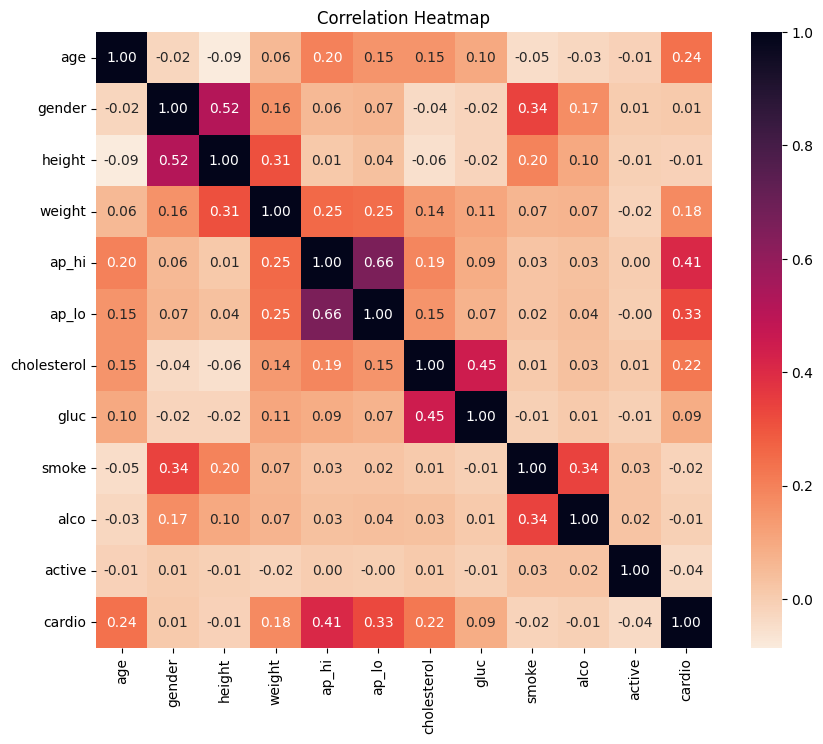

In [16]:
plt.subplots(figsize=(10, 8))
sns.heatmap(df.corr(), square=True, annot=True, cmap=sns.cm.rocket_r, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()